# 데이터 불러오기 및 데이터 스케일링

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
kream = pd.read_csv('df_filtered.csv', encoding = 'cp949')
kream

,상품명,거래량,최근거래가,발매일,발매일로부터현재까지일,발매가,색상개수,최고거래가,최고거래성사일,최저거래가,...,브랜드_Adidas,브랜드_Asics,브랜드_Converse,브랜드_Jordan,브랜드_Mihara Yasuhiro,브랜드_New Balance,브랜드_Nike,브랜드_Puma,브랜드_Salomon,브랜드_Vans
0,나이키 V2K 런 라이트 오어우드 브라운 카키,4.748321,3.427711,2024-01-04,12.402237,3.959586,4,2.869657,2024-05-10,3.734096,...,0,0,0,0,0,0,1,0,0,0
1,나이키 에어 줌 알파플라이 넥스트% 3 볼트,4.753022,3.471594,2024-02-15,10.657562,4.006456,4,2.885397,2024-02-15,3.800698,...,0,0,0,0,0,0,1,0,0,0
2,(W) 나이키 에어포스 1 '07 WB 플랙스 위트,4.535706,3.445503,2023-12-18,13.006454,3.969553,3,2.876575,2024-03-18,3.746308,...,0,0,0,0,0,0,1,0,0,0
3,(W) 나이키 코르테즈 SE 밸런타인데이 세일 어도비,4.742146,3.432313,2024-02-14,10.704532,3.955055,4,2.869657,2024-02-02,3.727202,...,0,0,0,0,0,0,1,0,0,0
4,나이키 V2K 런 화이트 퍼,4.735441,3.433910,2023-09-08,15.900007,3.959586,4,2.870449,2024-02-22,3.712485,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,나이키 에어포스 1 '07 LV8 화이트 블랙 울프 그레이,4.290478,3.459225,2021-11-27,25.740766,3.942443,4,2.879860,2023-06-15,3.750450,...,0,0,0,0,0,0,1,0,0,0
1717,나이키 에어포스 1 '07 LV8 넥스트 네이쳐 라탄 세일 브라운 켈프,3.338150,3.445911,2021-11-05,25.969419,3.968846,2,2.870449,2021-12-20,3.720837,...,0,0,0,0,0,0,1,0,0,0
1718,나이키 블레이저 미드 '77 점보 다크 러셋,2.754610,3.428090,2021-11-04,25.979726,3.955055,2,2.870449,2021-12-02,3.716376,...,0,0,0,0,0,0,1,0,0,0
1719,(W) 나이키 블레이저 미드 '77 LX 화이트 펜던트,2.689813,3.436583,2021-11-04,25.979726,3.959586,2,2.870525,2021-11-01,3.734731,...,0,0,0,0,0,0,1,0,0,0


In [18]:
kream_1 = kream[['수익률', '거래량', '가격변동성']]	#필요한 데이터 분리
print(kream_1)

            수익률       거래량       가격변동성
0     16.369253  4.748321  549.924666
1     34.619743  4.753022  421.307319
2     31.049965  4.535706  748.701225
3     19.775355  4.742146  644.740906
4     18.723327  4.735441  853.630261
...         ...       ...         ...
1716  71.567841  4.290478  870.972815
1717  11.500285  3.338150  761.553027
1718  22.134356  2.754610  812.235411
1719  18.948917  2.689813  586.101180
1720  18.996439  3.723108  855.295509

[1721 rows x 3 columns]


In [4]:
kream_1 = kream_1.rename(columns = {'수익률': 'rate', '거래량': 'volume', '가격변동성': 'variability'})    #열이름 변경
print(kream_1)

           rate    volume  variability
0     16.369253  4.748321   549.924666
1     34.619743  4.753022   421.307319
2     31.049965  4.535706   748.701225
3     19.775355  4.742146   644.740906
4     18.723327  4.735441   853.630261
...         ...       ...          ...
1716  71.567841  4.290478   870.972815
1717  11.500285  3.338150   761.553027
1718  22.134356  2.754610   812.235411
1719  18.948917  2.689813   586.101180
1720  18.996439  3.723108   855.295509

[1721 rows x 3 columns]


In [5]:
print("max\n", kream_1.max())
print("min\n", kream_1.min())

max
 rate            102.616755
volume            5.263811
variability    1234.283256
dtype: float64
min
 rate           -45.728531
volume           2.052011
variability    232.880173
dtype: float64


In [6]:
from sklearn.preprocessing import StandardScaler #스케일링

scaler = StandardScaler()
kream_1_scaled = scaler.fit_transform(kream_1)
print(kream_1_scaled)

[[-0.33447903  1.44678202 -0.8724063 ]
 [ 0.47077539  1.45274574 -1.46026883]
 [ 0.31326842  1.17704855  0.03612815]
 ...
 [-0.08010916 -1.08253079  0.32651952]
 [-0.22065819 -1.16473615 -0.70705678]
 [-0.21856143  0.14614975  0.52333137]]


## 조건이 '수익률', '거래량', '변동성' 일 때
### Kmeans

In [7]:
from sklearn.cluster import KMeans

### 그래프 그리기

In [8]:
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] =False

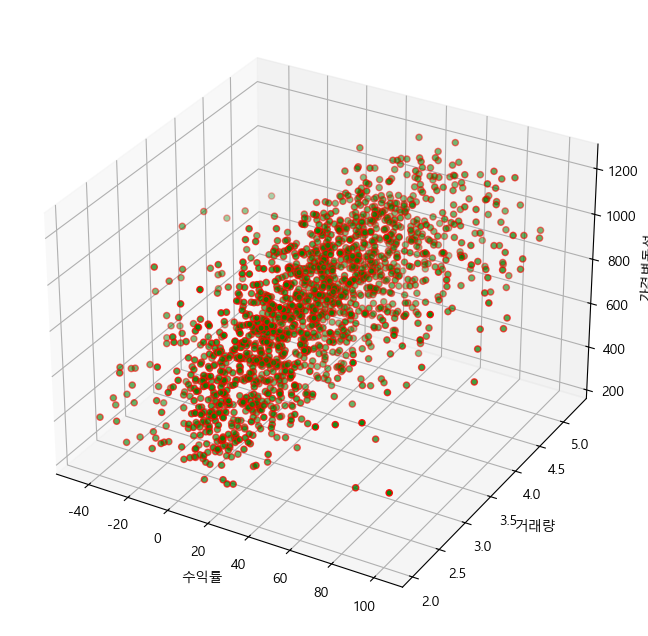

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

x = kream_1['rate']
y = kream_1['volume']
z = kream_1['variability']

ax.scatter(x, y, z, c = 'g', edgecolors = 'red')
ax.set_xlabel('수익률')
ax.set_ylabel('거래량')
ax.set_zlabel('가격변동성')

plt.show()

### K-means clustering 적용
elbow method를 이용하여 k값 찾기

In [10]:
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []

for n_clusters in range(2,15):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 10)
    cluster_labels = kmeans.fit_predict(kream_1_scaled)


    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(kream_1_scaled, cluster_labels))

C:\Users\oms83\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oms83\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\oms83\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oms83\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0.5, 1.0, 'K-Means Inertia')

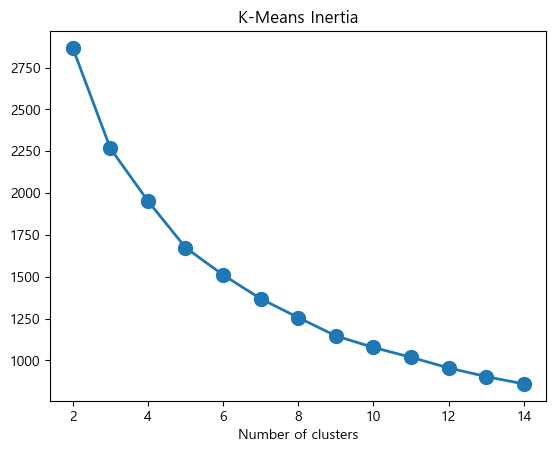

In [11]:
plt.plot(range(2,15), inertia, marker='o', lw=2, ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")

In [12]:
sil_scores #실루엣 스코어

[0.3706164739181626,
 0.28453111392480107,
 0.27564833871477956,
 0.2665882546973179,
 0.2634044141263099,
 0.27037795214612326,
 0.256193501557736,
 0.25427504359475583,
 0.2456100862106032,
 0.24302165077140067,
 0.2442444251717069,
 0.24963269347181052,
 0.24865994632527155]

Text(0.5, 1.0, 'Silhouette Score')

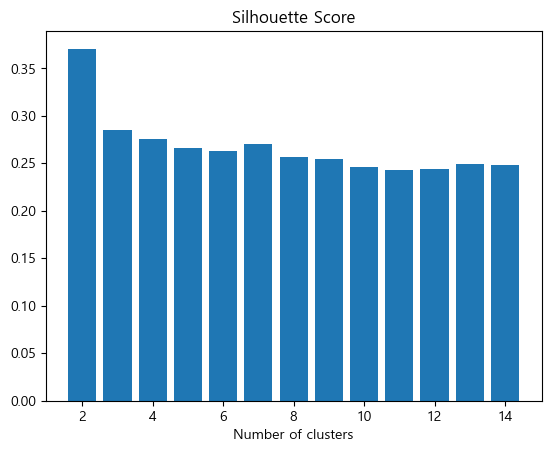

In [13]:
plt.bar(range(2,15), sil_scores)
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

inertia와 silhouette score을 고려해봤을 때 높지는 않지만 k = 2가 적절하다고 판단.

In [14]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(kream_1_scaled)

print(kmeans.cluster_centers_)

kmeans_labels = kmeans.labels_
print(kmeans_labels)

C:\Users\oms83\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oms83\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[[-0.57813169 -0.74331813 -0.69294296]
 [ 0.56419281  0.72539657  0.67623595]]
[1 1 1 ... 0 0 1]


In [15]:
kream_1_kmeans = pd.DataFrame(kmeans_labels)
kream_1_kmeans.value_counts()  #클러스터별 개수

1    870
0    851
Name: count, dtype: int64

In [16]:
kream_1.insert(3, 'kmeans', kream_1_kmeans)
kream_1_clustered = kream_1  #클러스터 라벨링

In [19]:
kream_1_clustered

,rate,volume,variability,kmeans
0,16.369253,4.748321,549.924666,1
1,34.619743,4.753022,421.307319,1
2,31.049965,4.535706,748.701225,1
3,19.775355,4.742146,644.740906,1
4,18.723327,4.735441,853.630261,1
...,...,...,...,...
1716,71.567841,4.290478,870.972815,1
1717,11.500285,3.338150,761.553027,0
1718,22.134356,2.754610,812.235411,0
1719,18.948917,2.689813,586.101180,0


### 그래프 그리기

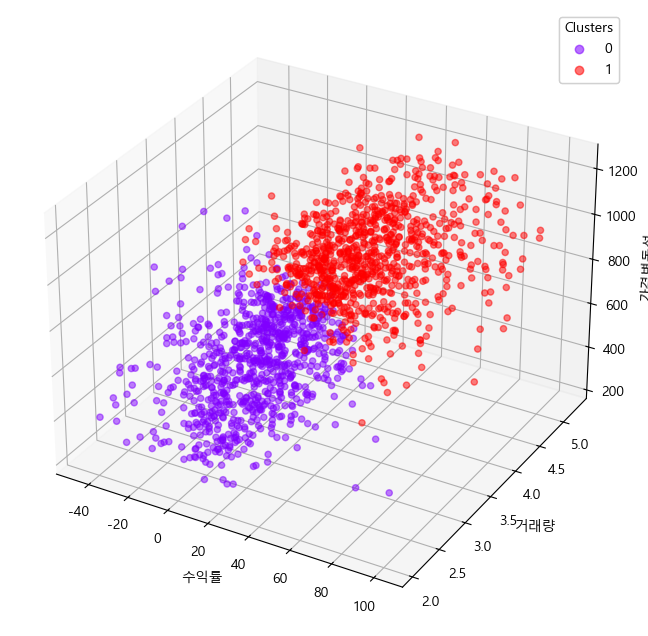

In [20]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

x = kream_1_clustered['rate']
y = kream_1_clustered['volume']
z = kream_1_clustered['variability']

scatter = ax.scatter(x, y, z, c = kream_1_clustered.kmeans, cmap = "rainbow", alpha = 0.5)
ax.set_xlabel('수익률')
ax.set_ylabel('거래량')
ax.set_zlabel('가격변동성')

legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.show()

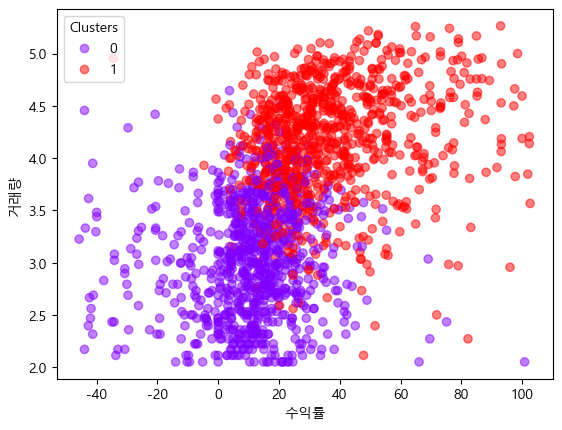

In [21]:
scatter = plt.scatter(kream_1_clustered['rate'], kream_1_clustered['volume'], c = kream_1_clustered.kmeans, cmap = "rainbow", alpha = 0.5)
plt.xlabel('수익률')
plt.ylabel('거래량')
plt.legend(*scatter.legend_elements(), title="Clusters")

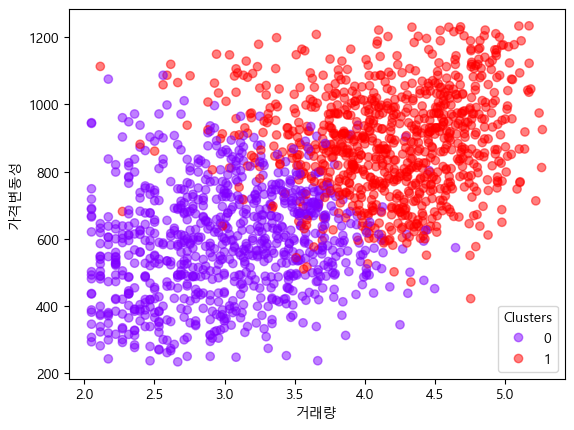

In [22]:
scatter = plt.scatter(kream_1_clustered['volume'], kream_1_clustered['variability'], c = kream_1_clustered.kmeans, cmap = "rainbow", alpha = 0.5)
plt.xlabel('거래량')
plt.ylabel('가격변동성')
plt.legend(*scatter.legend_elements(), title="Clusters")

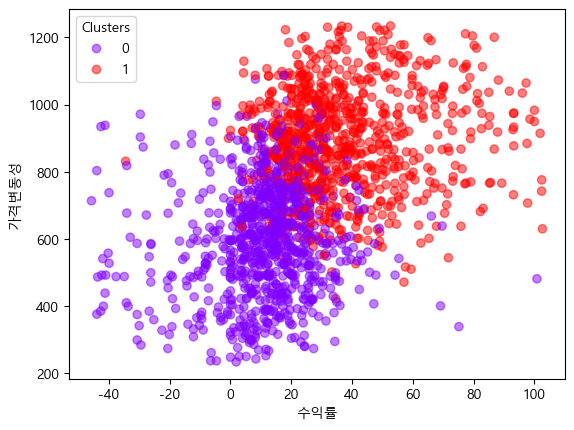

In [23]:
scatter = plt.scatter(kream_1_clustered['rate'], kream_1_clustered['variability'], c = kream_1_clustered.kmeans, cmap = "rainbow", alpha = 0.5)
plt.xlabel('수익률')
plt.ylabel('가격변동성')
plt.legend(*scatter.legend_elements(), title="Clusters")

### 결과와 관련된 통계량

In [24]:
print("평균값\n", kream_1_clustered[['rate', 'volume', 'variability', 'kmeans']].groupby('kmeans').mean())
print("\n표준편차\n", kream_1_clustered[['rate', 'volume', 'variability', 'kmeans']].groupby('kmeans').std())
print("\n중앙값\n", kream_1_clustered[['rate', 'volume', 'variability', 'kmeans']].groupby('kmeans').median())
print("\n최대값\n", kream_1_clustered[['rate', 'volume', 'variability', 'kmeans']].groupby('kmeans').max())
print("\n최소값\n", kream_1_clustered[['rate', 'volume', 'variability', 'kmeans']].groupby('kmeans').min())

평균값
              rate    volume  variability
kmeans                                  
0       10.875575  3.022549   589.294419
1       36.738833  4.180480   888.990537

표준편차
              rate    volume  variability
kmeans                                  
0       16.675094  0.544905   163.987922
1       20.351079  0.525646   155.021956

중앙값
              rate    volume  variability
kmeans                                  
0       12.058563  3.010579   587.169207
1       32.294936  4.209659   887.614362

최대값
               rate    volume  variability
kmeans                                   
0       100.819140  4.645271  1087.030774
1       102.616755  5.263811  1234.283256

최소값
              rate    volume  variability
kmeans                                  
0      -45.728531  2.052011   232.880173
1      -34.499665  2.114824   421.307319


## 클러스터별 상품

In [198]:
cluster_0 = kream_1_clustered.query('kmeans == 0')
print(cluster_0.query('50 < rate < 60 & 200 < volume < 340 & 68 < variability < 72'), '\n')
index_0 = cluster_0.query('50 < rate < 60 & 200 < volume < 340 & 68 < variability < 72').index
print(kream.iloc[index_0, 1])

       rate  volume  variability  kmeans
764   50.36     258        71.29       0
1779  58.27     234        70.00       0
1861  57.25     204        69.69       0 

764        (W) 나이키 에어포스 1 '07 미드 화이트
1779    (W) 나이키 에어포스 1 '07 LX 아워포스 1
1861               나이키 에어 줌 GT 점프 블랙
Name: 상품명, dtype: object


In [200]:
cluster_1 = kream_1_clustered.query('kmeans == 1')
print(cluster_1.query('170 < rate < 220 & 5000 < volume < 15000 & 70 < variability < 80'), '\n')
index_1 = cluster_1.query('170 < rate < 220 & 5000 < volume < 15000 & 70 < variability < 80').index
print(kream.iloc[index_1, 1])

       rate  volume  variability  kmeans
253  172.66   11000        76.25       1
497  190.70    8103        75.73       1
810  210.08    7123        78.75       1 

253    (W) 나이키 에어포스 1 '07 SE 40주년 조인 포스 세일 말라카이트
497                        (W) 나이키 덩크 로우 트리플 화이트
810                         (W) 나이키 덩크 로우 하베스트 문
Name: 상품명, dtype: object


In [201]:
cluster_2 = kream_1_clustered.query('kmeans == 2')
print(cluster_2.query('200 < rate < 300 & 450 < volume < 750 & 65 < variability < 75'), '\n')
index_2 = cluster_2.query('200 < rate < 300 & 450 < volume < 750 & 65 < variability < 75').index
print(kream.iloc[index_2, 1])

        rate  volume  variability  kmeans
946   234.64     468        74.29       2
1300  271.19     749        72.60       2
1370  278.15     527        73.56       2
1988  278.20     583        70.18       2 

946      나이키 x 클랏 x 프라그먼트 덩크 로우 블랙 앤 화이트
1300             (TD) 나이키 덩크 로우 유니버시티 블루
1370         나이키 x 루오한 왕 에어포스 1 로우 플라이레더
1988    나이키 에어포스 1 '07 LV8 화이트 블랙 울프 그레이
Name: 상품명, dtype: object


In [202]:
cluster_3 = kream_1_clustered.query('kmeans == 3')
print(cluster_3.query('20 < rate < 28 & 50 < volume < 120 & 48 < variability < 55'), '\n')
index_3 = cluster_3.query('20 < rate < 28 & 50 < volume < 120 & 48 < variability < 55').index
print(kream.iloc[index_3, 1])

       rate  volume  variability  kmeans
659   27.85      61        53.57       3
1638  20.40      57        53.06       3
1851  20.94      64        53.41       3
1924  24.03      54        50.00       3 

659                  나이키 줌 보메로 5 벨벳 브라운 미디엄 애쉬
1638    (W) 나이키 에어맥스 스콜피온 플라이니트 블랙 앤 페르시안 바이올렛
1851               나이키 에어맥스 97 스타디움 그레이 앤트러사이트
1924                     (GS) 나이키 덩크 하이 앤트러사이트
Name: 상품명, dtype: object


In [203]:
cluster_4 = kream_1_clustered.query('kmeans == 4')
print(cluster_4.query('130 < rate < 142 & 2000 < volume < 2800 & 70 < variability < 80'), '\n')
index_4 = cluster_4.query('130 < rate < 142 & 2000 < volume < 2800 & 70 < variability < 80').index
print(kream.iloc[index_4, 1])

       rate  volume  variability  kmeans
412  130.22    2256        79.69       4
586  132.56    2363        76.67       4
600  137.41    2668        78.79       4 

412                (W) 나이키 덩크 로우 디스럽트 2 블랙 화이트
586                    (W) 나이키 덩크 로우 애트모스피어 핑크
600    나이키 에어포스 1 '07 LV8 애슬레틱 클럽 러쉬 오렌지 워시드 틸
Name: 상품명, dtype: object


In [204]:
kream.iloc[index_4, ()]

412                (W) 나이키 덩크 로우 디스럽트 2 블랙 화이트
586                    (W) 나이키 덩크 로우 애트모스피어 핑크
600    나이키 에어포스 1 '07 LV8 애슬레틱 클럽 러쉬 오렌지 워시드 틸
Name: 상품명, dtype: object